In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pwd

'C:\\Users\\seren\\Downloads\\Springboard\\capstone project 2'

In [3]:
df = pd.read_csv('California_Houses.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [5]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [6]:
#check number of unique dates
print('Median_House_Value:', len(df['Median_House_Value'].unique()))


Median_House_Value: 3842


In [7]:
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Median_House_Value,3842
Median_Income,12928
Median_Age,52
Tot_Rooms,5926
Tot_Bedrooms,1928
Population,3888
Households,1815
Latitude,862
Longitude,844
Distance_to_coast,12590


In [8]:
cont_col = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast', 
            'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
loc_col = ['Latitude', 'Longitude']
dist_col = ['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = 'Median_House_Value'

In [9]:
df.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [10]:
#check if any of columns has na values
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


This dataset is clean, and there is no NA values

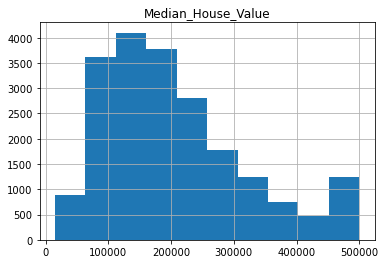

In [11]:
# Making a histogram of the meidan income.
df.hist(column="Median_House_Value")
plt.show()

In [12]:
df["Median_House_Value"].value_counts(dropna=False)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: Median_House_Value, Length: 3842, dtype: int64

 Question: What are the top 10 house price in California?

In [38]:
df.sort_values(by='Median_House_Value',ascending=False).head(10)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,New_Median_House_Value,Years_to_Buy
10667,500001.0,10.1275,27,2278,316,772,304,33.55,-117.88,8573.576933,65176.733846,114396.310081,556058.424728,624054.364839,50.0001,4.937062
16916,500001.0,7.0422,52,2635,408,967,374,37.57,-122.34,4456.054691,537880.803256,716042.627881,47294.325414,24061.973816,50.0001,7.100068
16946,500001.0,6.1349,33,2199,312,827,319,37.55,-122.33,5459.091002,535678.775999,713809.781036,45356.737032,26452.666257,50.0001,8.150108
8877,500001.0,8.0257,48,2381,345,859,306,34.04,-118.49,2925.059144,22735.077659,192113.706104,478184.411447,546134.321922,50.0001,6.229999
8878,500001.0,15.0001,52,3000,374,1143,375,34.04,-118.50,2579.387477,23654.837074,192711.351437,477604.972516,545550.049652,50.0001,3.333318
8879,500001.0,8.3839,52,2233,317,769,277,34.04,-118.50,2579.387477,23654.837074,192711.351437,477604.972516,545550.049652,50.0001,5.963824
16941,500001.0,6.9533,44,2465,328,843,324,37.55,-122.34,5967.458099,536298.935033,714407.783160,46109.966623,26169.077288,50.0001,7.190845
16940,500001.0,9.3694,51,2565,332,870,309,37.55,-122.33,5459.091002,535678.775999,713809.781036,45356.737032,26452.666257,50.0001,5.336532
16939,500001.0,4.6406,50,2501,433,1050,410,37.55,-122.32,5054.332607,535059.415716,713212.433722,44608.261276,26762.215468,50.0001,10.774490
16938,500001.0,10.0743,50,1975,245,644,251,37.56,-122.33,4548.511495,536470.137431,714627.568818,45949.086011,25408.347148,50.0001,4.963134


Observation:

1. Highest housing price: The highest houing price is $500001 and appears 10 times. 
2. Age greoup: The age group is close to late 40's and 50's. 
3. Location: I checked the location from Google, the city San Mateo appears a couple of times here. 
    Fun Facts: San Mateo is a child's paradise as it features many tourist spots for children. It makes sense why the housing price is higher there

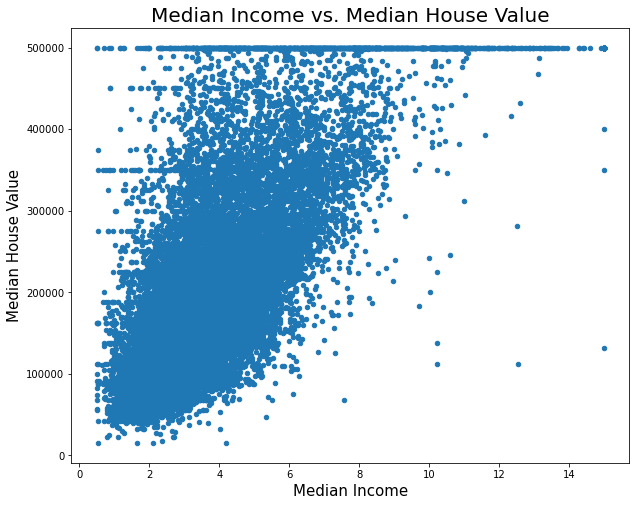

In [13]:
df.plot(kind = "scatter", x = 'Median_Income', y = 'Median_House_Value', figsize = (10, 8))
plt.xlabel("Median Income", size = 15)
plt.ylabel("Median House Value", size = 15)
plt.title("Median Income vs. Median House Value", size = 20)
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


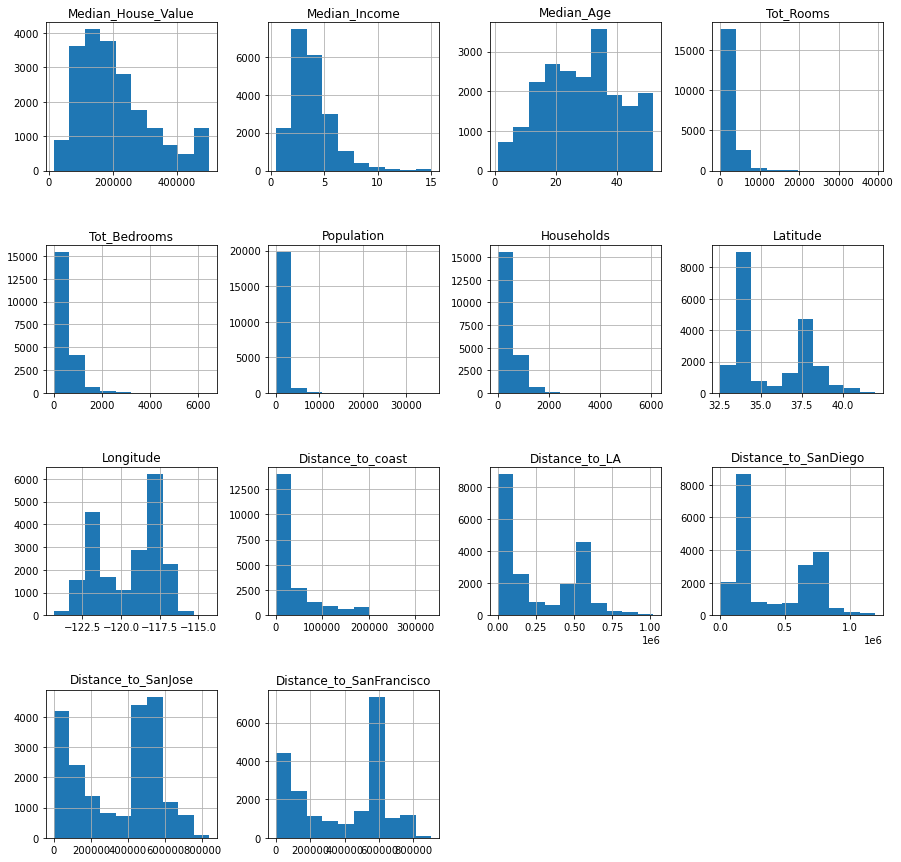

In [15]:
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

In [16]:
#Identifying Outliers with Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Median_House_Value          145125.000000
Median_Income                    2.179850
Median_Age                      19.000000
Tot_Rooms                     1700.250000
Tot_Bedrooms                   352.000000
Population                     938.000000
Households                     325.000000
Latitude                         3.780000
Longitude                        3.790000
Distance_to_coast            40750.657717
Distance_to_LA              495044.981476
Distance_to_SanDiego        546369.004388
Distance_to_SanJose         403826.562281
Distance_to_SanFrancisco    467156.530402
dtype: float64


In [17]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
print(df[cont_col].skew())
print(df[loc_col].skew())
print(df[dist_col].skew())
print(df[target].skew())

Median_Income               1.646657
Median_Age                  0.060331
Tot_Rooms                   4.147343
Tot_Bedrooms                3.453073
Population                  4.935858
Households                  3.410438
Distance_to_coast           1.938709
Distance_to_LA              0.466536
Distance_to_SanDiego        0.384936
Distance_to_SanJose        -0.223069
Distance_to_SanFrancisco   -0.263499
dtype: float64
Latitude     0.465953
Longitude   -0.297801
dtype: float64
Distance_to_coast           1.938709
Distance_to_LA              0.466536
Distance_to_SanDiego        0.384936
Distance_to_SanJose        -0.223069
Distance_to_SanFrancisco   -0.263499
dtype: float64
0.9777632739098341


Ideally, the skewness value should be between -1 and +1. The result from above, it seems Tot_rooms, populations, Tot_bedroom, Househoulds are skewed 

In [18]:
skew = ['Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']

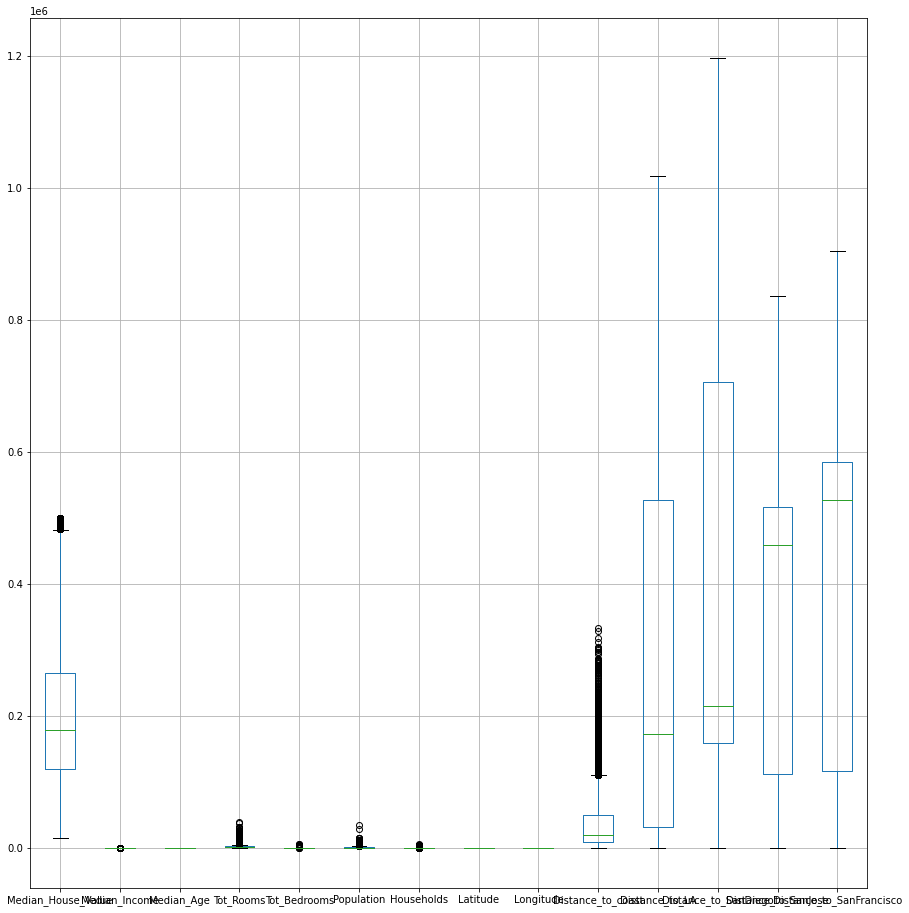

In [19]:
df.boxplot(figsize=(15,16))
plt.subplots_adjust(hspace=0.5);

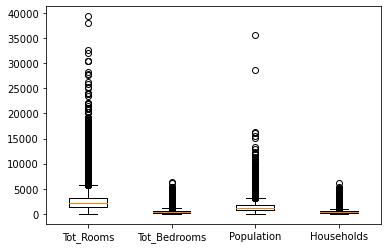

In [20]:
plt.boxplot(df[skew])
plt.xticks([1, 2, 3, 4],  ['Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households'])
plt.show()

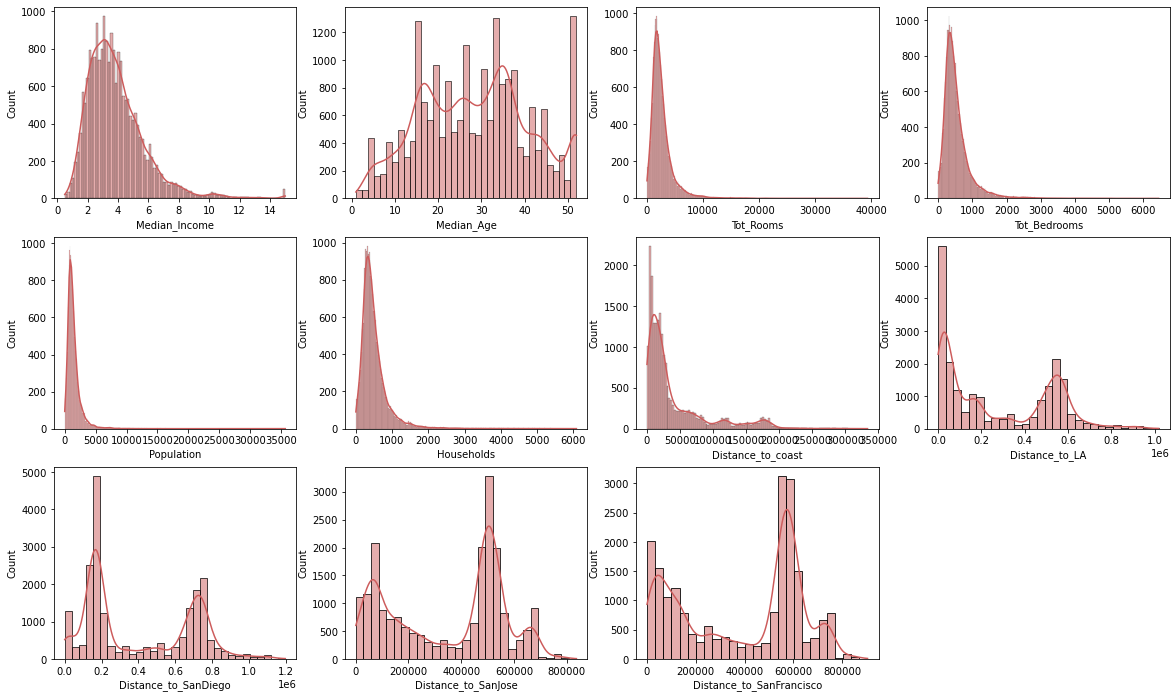

In [21]:

plt.figure(figsize=(20, 12))
for i, column in enumerate(cont_col, 1):
    plt.subplot(3, 4, i)
    sns.histplot(x=df[column],color='indianred', kde=True)
    #ax.legend()
    #plt.legend()
    plt.xlabel(column)

In [22]:
df.median()

Median_House_Value          179700.000000
Median_Income                    3.534800
Median_Age                      29.000000
Tot_Rooms                     2127.000000
Tot_Bedrooms                   435.000000
Population                    1166.000000
Households                     409.000000
Latitude                        34.260000
Longitude                     -118.490000
Distance_to_coast            20522.019101
Distance_to_LA              173667.461747
Distance_to_SanDiego        214739.830318
Distance_to_SanJose         459758.877000
Distance_to_SanFrancisco    526546.661701
dtype: float64

#Median_Income is measured in tens of thousands of US Dollars) (10k$), so I will divide 10k from Median_House value.

In [23]:
df['New_Median_House_Value'] = df['Median_House_Value'].multiply(1/10000) 
df['Years_to_Buy'] = df['New_Median_House_Value']/df['Median_Income']

In [24]:
df.median()

Median_House_Value          179700.000000
Median_Income                    3.534800
Median_Age                      29.000000
Tot_Rooms                     2127.000000
Tot_Bedrooms                   435.000000
Population                    1166.000000
Households                     409.000000
Latitude                        34.260000
Longitude                     -118.490000
Distance_to_coast            20522.019101
Distance_to_LA              173667.461747
Distance_to_SanDiego        214739.830318
Distance_to_SanJose         459758.877000
Distance_to_SanFrancisco    526546.661701
New_Median_House_Value          17.970000
Years_to_Buy                     4.950018
dtype: float64

It takes about 5 years without any saving to purchase a house in California back to 1990 (the dataset was collected in 1990) </br>

the median of house owner is about 29 years old

Question: Does location affect house price?

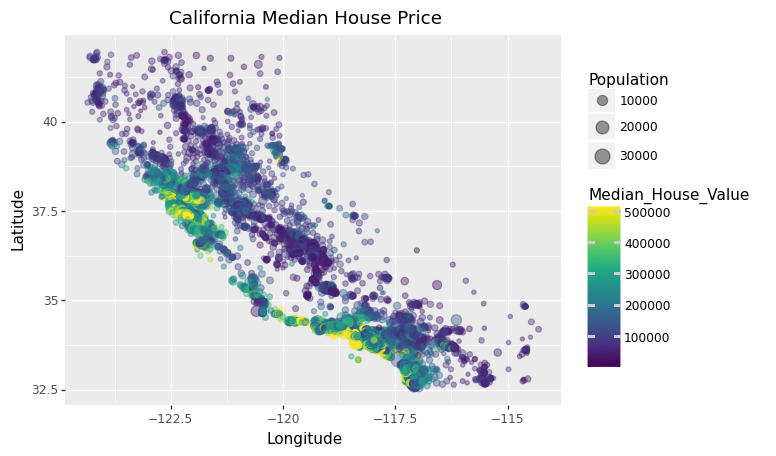

<ggplot: (152179029056)>

In [40]:
from plotnine import *
import matplotlib.style as style
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
(
ggplot(data = df)+
    geom_point(mapping=aes(x='Longitude',y='Latitude',
                           size='Population',color='Median_House_Value'),alpha=0.4) +
    labs(title='California Median House Price')
)

From the ggplot, I can see the house price incases as it more close to the coast especially in LA (Southern California) and Bay area (Northern California) 

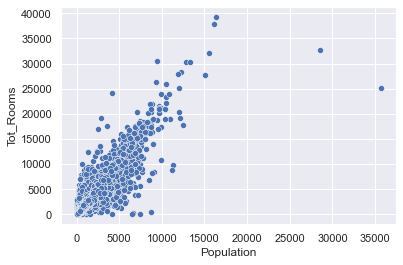

In [37]:
sns.scatterplot(x=df["Population"], y=df["Tot_Rooms"])
plt.show()

 it makes sense to see population and Total room has the positve relationship.

<AxesSubplot:xlabel='Median_Age', ylabel='Median_Income'>

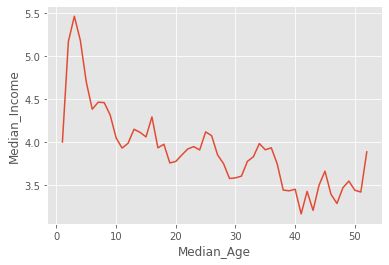

In [33]:
ex1 = df.groupby(['Median_Age'], as_index=False).mean().sort_values(['Median_Income'])

sns.lineplot(x='Median_Age', y='Median_Income', data=ex1)
#plt.xticks(rotation=-45)

It seems strange to see age < 10 has more income compared to mid-late 10's, 20s, 30s

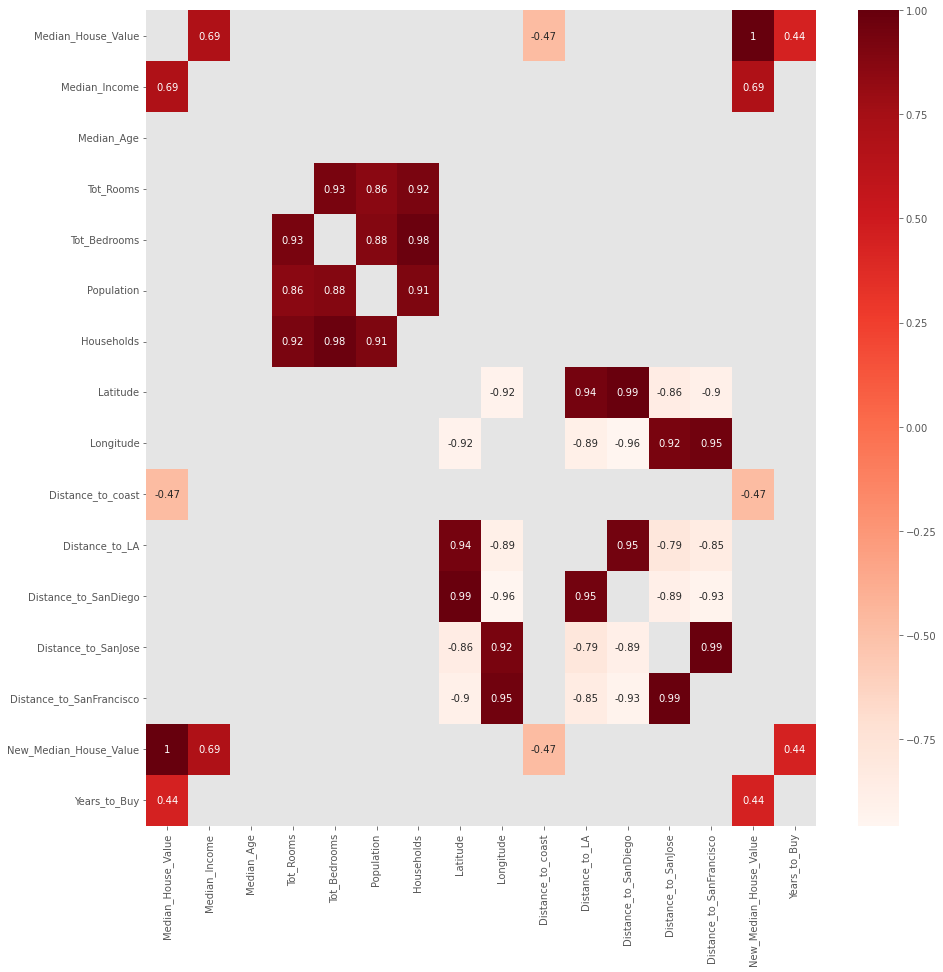

In [34]:
#plt.subplots(figsize=(12,10))
#sns.heatmap(df.corr());
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .4) | (dfCorr <= -.4)) & (dfCorr !=1.00)]
plt.figure(figsize=(15,15))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
#df.corr()

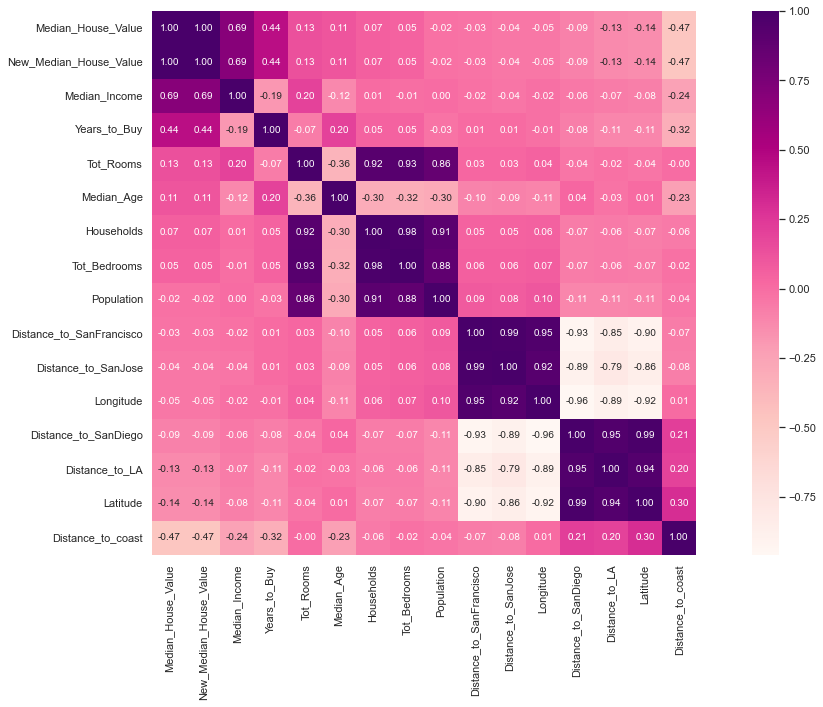

In [35]:
    plt.figure(figsize = (20,10))
    corrmatrix = df.corr()
 
    columnss = corrmatrix.nlargest(len(df), target)[target].index
    cm = np.corrcoef(df[columnss].values.T)
    sns.set(font_scale = 1)
    hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                     yticklabels = columnss.values, xticklabels = columnss.values)
    plt.show()

Observation:

From the heatmap, I can see that household, population, bedroom are highly correlated (>0.9), distance to coast is also correlated with the housing price. The Median_house_value will be the target in this dataset
